In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\jagra\\Desktop\\Campusx\\startup-dashboard\\startup_funding.csv")
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [4]:
df.drop(columns="Remarks",inplace=True)

In [5]:
df.head(1)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [6]:
df.set_index("Sr No",inplace=True)

In [7]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'    
    
},inplace=True)

In [8]:
df.head(1)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [9]:
# removing missing values
df["amount"]=df["amount"].fillna("0")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   startup      3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   investors    3020 non-null   object
 6   round        3040 non-null   object
 7   amount       3044 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [11]:
# df["amount"].astype("int") # need to remove commmas

In [12]:
df.head(1)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [13]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')
df.sample(5)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
2114,01/12/2015,Zapluk,"Health, Wellness & Beauty Services App",NaN,Hyderabad,NaN,Seed Funding,0
1342,01/09/2016,Renowala,eCommerce,Home Improvement Marketplace,Hyderabad,Pradeep Dhobale,Seed Funding,0
1922,05/02/2016,Gingercrush,Ecommerce,Personalized Products & Merchandize eTailer,Vadodara,"Saha Fund, TV Mohandas Pai, Zia Mody, Mumbai A...",Private Equity,1000000
1014,13/02/2017,Wassup,Consumer Internet,On Demand Laundry & Dry Cleaning Services,Chennai,Anil Jain & other HNIs,Private Equity,3200000
1244,26/11/2016,TapChief,Consumer Internet,Professional Expert Advice Platform,Bangalore,"Paytm, Aprameya Radhakrishna, Subramanya Venka...",Seed Funding,0


In [14]:
df=df[df["amount"].str.isdigit()]

In [15]:
df["amount"]=df["amount"].astype("float")

In [16]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [17]:
def to_inr(dollar):
    inr=dollar*86.74
    return round(inr/100000000,2)

In [18]:
df.amount=df.amount.apply(to_inr)

In [19]:
df.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,173.48
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,6.98


In [20]:
df.date=df.date.str.replace("05/072018","05/07/2018")

In [21]:
df.date=df.date.str.replace("01/07/015","01/07/2015")

In [22]:
df.date=df.date.str.replace("12/05.2015","12/05/2015")

In [23]:
df.date=df.date.str.replace("13/04.2015","13/04/2015")

In [24]:
df.date=pd.to_datetime(df.date,dayfirst=True,errors="coerce")

In [25]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,173.48
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,6.98
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,15.92
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,2.60
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.56


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3027 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3005 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [27]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2823 non-null   datetime64[ns]
 1   startup      2823 non-null   object        
 2   vertical     2823 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2823 non-null   object        
 5   investors    2823 non-null   object        
 6   round        2823 non-null   object        
 7   amount       2823 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.5+ KB


In [35]:
df.to_csv("startup_cleaned.csv",index=False)

In [34]:
sorted(set(df["investors"].str.split(",").sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [39]:
df.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,173.48
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,6.98


In [41]:
df["year"]=df.date.dt.year

In [42]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,173.48,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,6.98,2020
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,15.92,2020
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,2.60,2020
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.56,2020


<Axes: xlabel='year'>

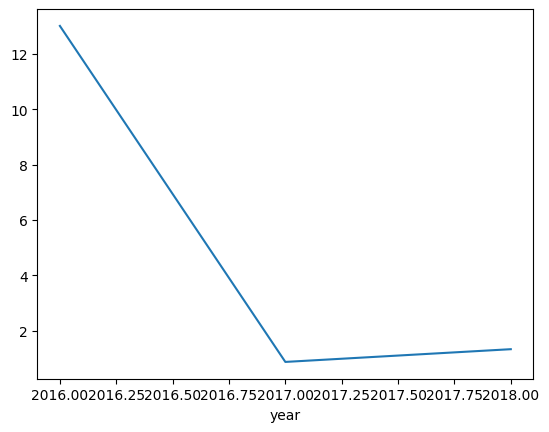

In [44]:
df[df.investors.str.contains("IDF")].groupby("year")["amount"].sum().plot()